<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Econo_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [105]:
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)







def show_res(y_actual, y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))




def actual_vs_pred(y_actual, y_pred):
  pred_y_df=pd.DataFrame(
    {
        "Actual_Value":y_actual,
        "Predicted_Value":y_pred,
        "Difference":y_actual-y_pred
    }
    )

  sns.set(rc={'figure.figsize':(10,20)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

def single_pred(model,open,high,low):
  test_sub = {
    'open':[open],
    'high':[high],
    'low':[low]
  }
  test_sub_df = pd.DataFrame(test_sub)

  ex_specie = np.array(test_sub_df.iloc[0]).reshape(1,-1)

  return model.predict(ex_specie)



In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')

In [3]:
dataset.head()

status                                               success
remarks                                                     
data       {'open': [6.63, 6.75, 6.75, 6.53, 6.5600000000...
dtype: object

In [4]:
df = pd.DataFrame(dataset['data'])

In [5]:
df.shape

(4903, 6)

In [6]:
df.head(5)

,open,high,low,close,volume,start_Time
0,6.63,6.72,6.50,6.59,43406.0,2003-09-05 00:00:00
1,6.75,6.81,6.57,6.62,37381.0,2003-09-08 00:00:00
2,6.75,6.87,6.47,6.59,41136.0,2003-09-09 00:00:00
3,6.53,6.68,6.50,6.58,36487.0,2003-09-10 00:00:00
4,6.56,6.75,6.47,6.53,38052.0,2003-09-11 00:00:00


#Spliting : X and y

In [49]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

#Scaling Dataset

In [19]:
X = MinMaxScaleData(X)

#Spliting: Training and Testing

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



---



#Training Sections

##Kernel Ridge Regression

In [51]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

In [76]:
show_res(y_test,y_pred)

Mean absolute error = 3.49
Mean squared error = 80.88
Median absolute error = 1.23
Explain variance score = 1.0
R2 score = 1.0


In [67]:
X.iloc[0]

open    6.63
high    6.72
low     6.50
Name: 0, dtype: float64

In [68]:
y.iloc[0]

6.59

In [92]:
single_pred(krr,6.63,6.72,6.50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([6.60286757])

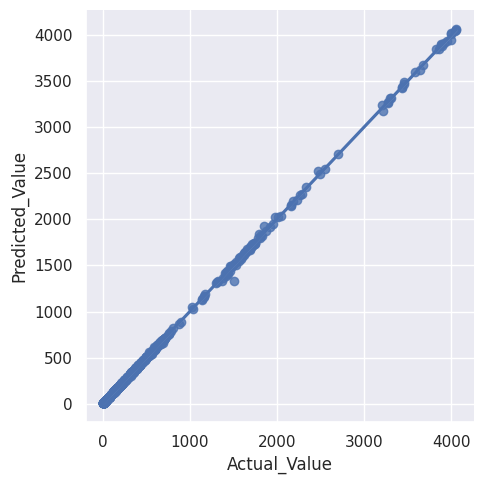

In [86]:
actual_vs_pred(y_test,y_pred)

##Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [94]:
show_res(y_test,y_pred)

Mean absolute error = 3.52
Mean squared error = 80.72
Median absolute error = 1.18
Explain variance score = 1.0
R2 score = 1.0


In [109]:
X_test.iloc[1]

open    74.60
high    77.45
low     72.30
Name: 2998, dtype: float64

In [111]:
y_test.iloc[1]

74.65

In [112]:
single_pred(lin_reg,74.60,77.45,72.30)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([74.74987838])

##Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor

deci_regr = DecisionTreeRegressor()
deci_regr.fit(X_train, y_train)
y_pred = deci_regr.predict(X_test)

In [118]:
show_res(y_test,y_pred)

Mean absolute error = 5.87
Mean squared error = 252.27
Median absolute error = 1.65
Explain variance score = 1.0
R2 score = 1.0


In [119]:
X_test.iloc[1]

open    74.60
high    77.45
low     72.30
Name: 2998, dtype: float64

In [120]:
y_test.iloc[1]

74.65

In [122]:
single_pred(deci_regr,74.60,77.45,72.30)

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


array([73.45])

##Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


In [125]:
show_res(y_test,y_pred)

Mean absolute error = 4.6
Mean squared error = 157.71
Median absolute error = 1.51
Explain variance score = 1.0
R2 score = 1.0


In [126]:
X_test.iloc[1]

open    74.60
high    77.45
low     72.30
Name: 2998, dtype: float64

In [127]:
y_test.iloc[1]

74.65

In [128]:
single_pred(rf_reg,74.60,77.45,72.30)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([75.5927])

###Lasso Regressor

In [130]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_test)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.287e+05, tolerance: 1.850e+05


In [131]:
show_res(y_test,y_pred)

Mean absolute error = 4.6
Mean squared error = 157.71
Median absolute error = 1.51
Explain variance score = 1.0
R2 score = 1.0


In [132]:
X_test.iloc[1]

open    74.60
high    77.45
low     72.30
Name: 2998, dtype: float64

In [133]:
y_test.iloc[1]

74.65

In [135]:
single_pred(lasso,74.60,77.45,72.30)

X does not have valid feature names, but Lasso was fitted with feature names


array([74.56949132])